## Crop Recommendation and Fertilizer Prediction using Machine Learning

In [106]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
# Reading the dataset which is in .csv format 
crop=pd.read_csv("dataset/Crop_recommendation.csv")

In [108]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [109]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [110]:
#shape returns the number of rows and columns in a dataset
crop.shape

(2200, 8)

In [111]:
#It returns the description abouve the given dataset
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [112]:
#It checks whether teh given dataset conatins null values or not and return Boolean values
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [113]:
#It returns the sum of missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [114]:
#Checks fro duplicated values
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [115]:
#Returns the sum of duplicated values
crop.duplicated().sum()

0

In [116]:
#To check the statistics of the given dataset: Total Values in col, Mean, Standard Deviation, Minimum, 25%, 50%,75%, Max
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [117]:
#Returns the column names as a list
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [118]:
#Checks the feature of specific column(checks target feature distribution )
crop['label'].value_counts()

pomegranate    100
blackgram      100
coconut        100
apple          100
pigeonpeas     100
mothbeans      100
orange         100
grapes         100
watermelon     100
muskmelon      100
jute           100
mango          100
kidneybeans    100
banana         100
papaya         100
cotton         100
lentil         100
mungbean       100
maize          100
rice           100
coffee         100
chickpea       100
Name: label, dtype: int64

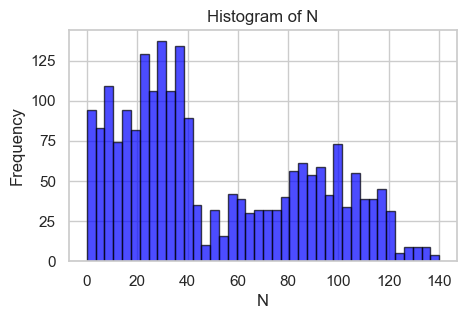

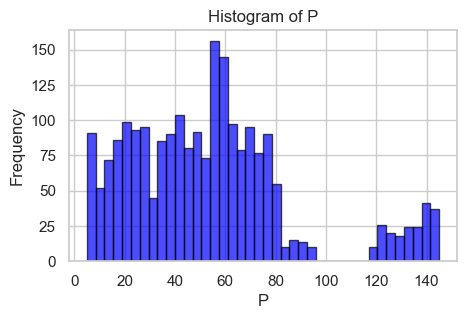

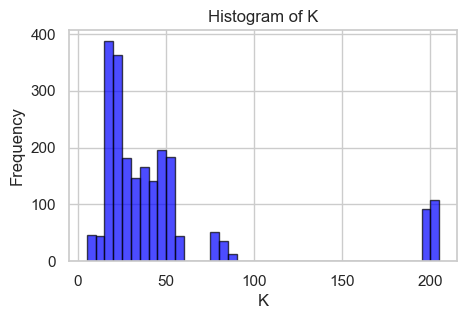

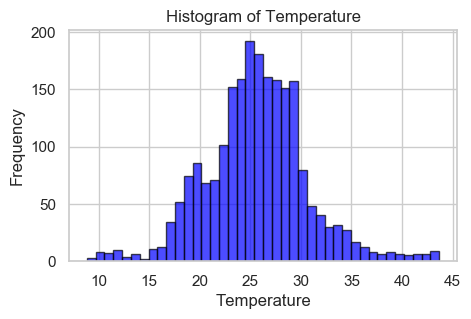

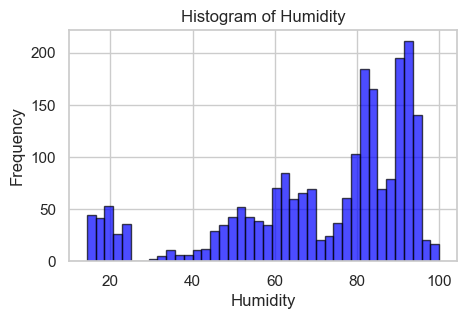

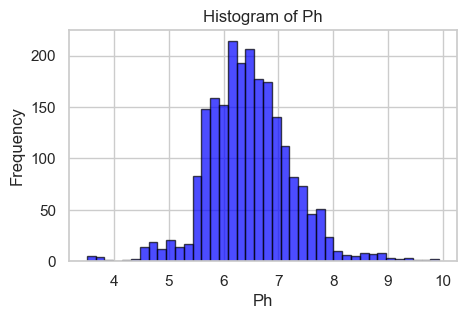

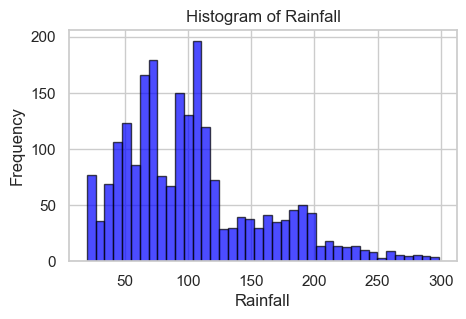

In [119]:
##We can iterate through columns(list containing the labels of dataframe 'crop') to plot histograms for each label and 
##we have given xlabel,ylabel and others features to enhance the graph representation.
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    plt.figure(figsize=(5,3))
    plt.hist(crop[col], bins=40, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()


In [120]:
#calculates the correlation matrix for the crop dataset: computes the pairwise correlation of all numerical columns in the crop DataFrame.
#If corr is 1: it is perferctly positive correlated, corr==-1: negatively correlated, corr=0:represents no relation i.e., 
#corr_matrix shows the realtion between the different columns of dataset and how to effect each other.
corr_mat=crop.corr()
corr_mat

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [121]:
features=crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


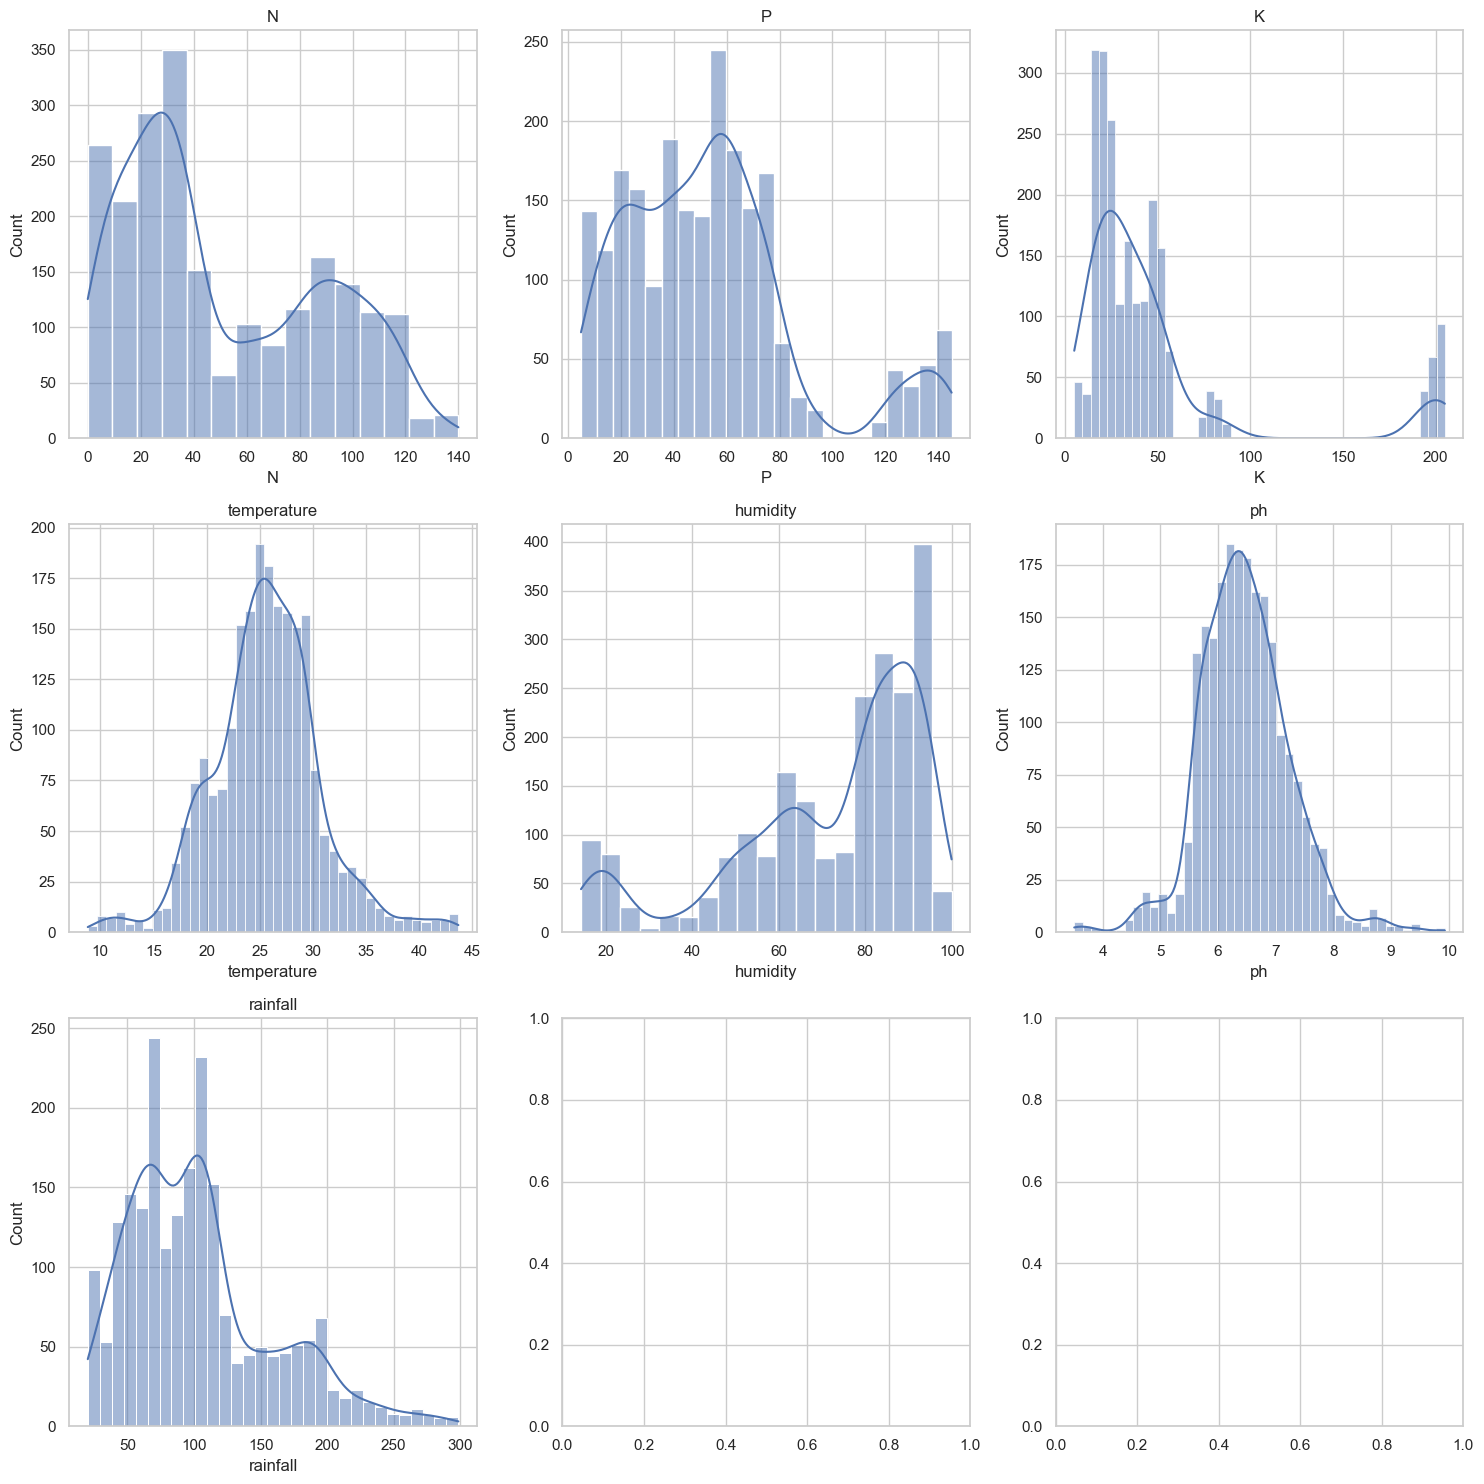

In [122]:
#Visualising the distribution of each feature

fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)

plt.tight_layout()
plt.show()

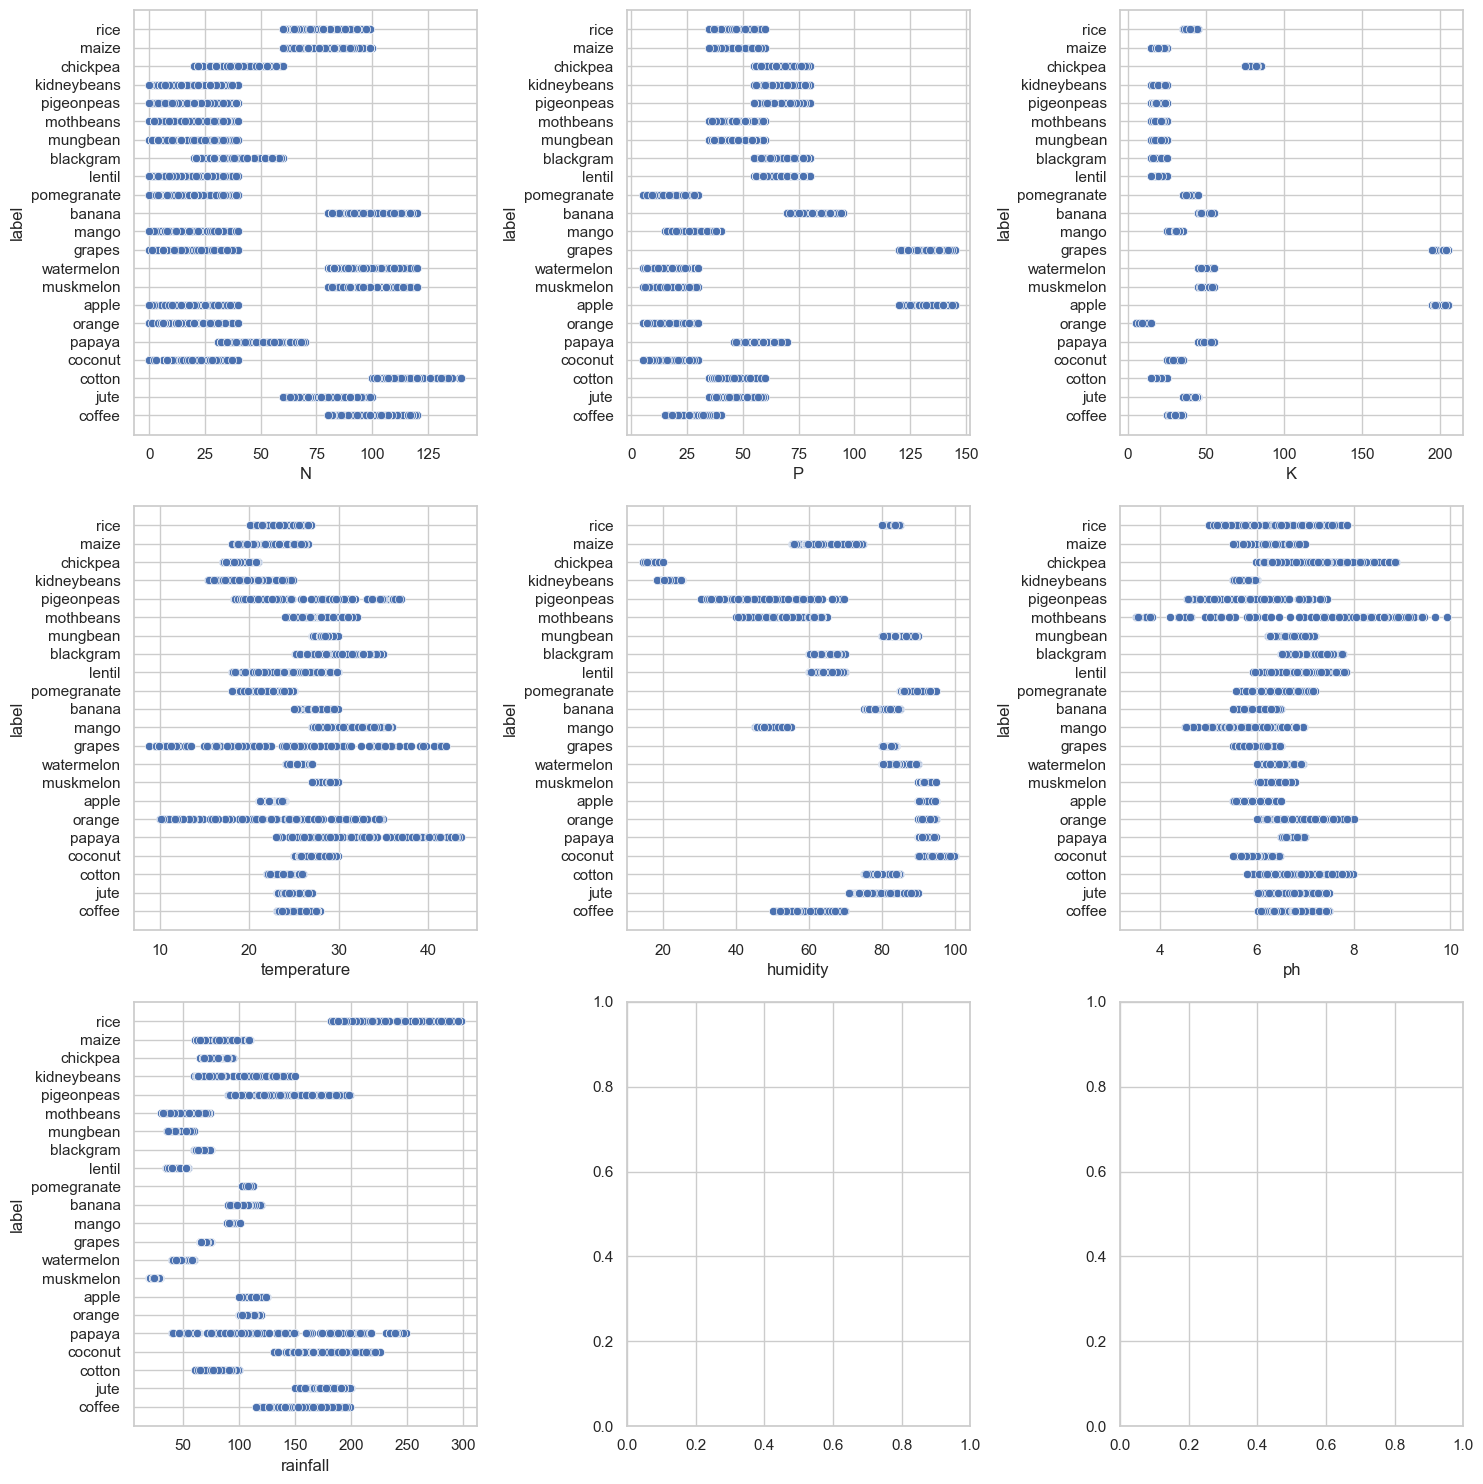

In [123]:
#Plotting scatter plot

fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label',data=crop, ax=subplot)
plt.tight_layout()
plt.show()

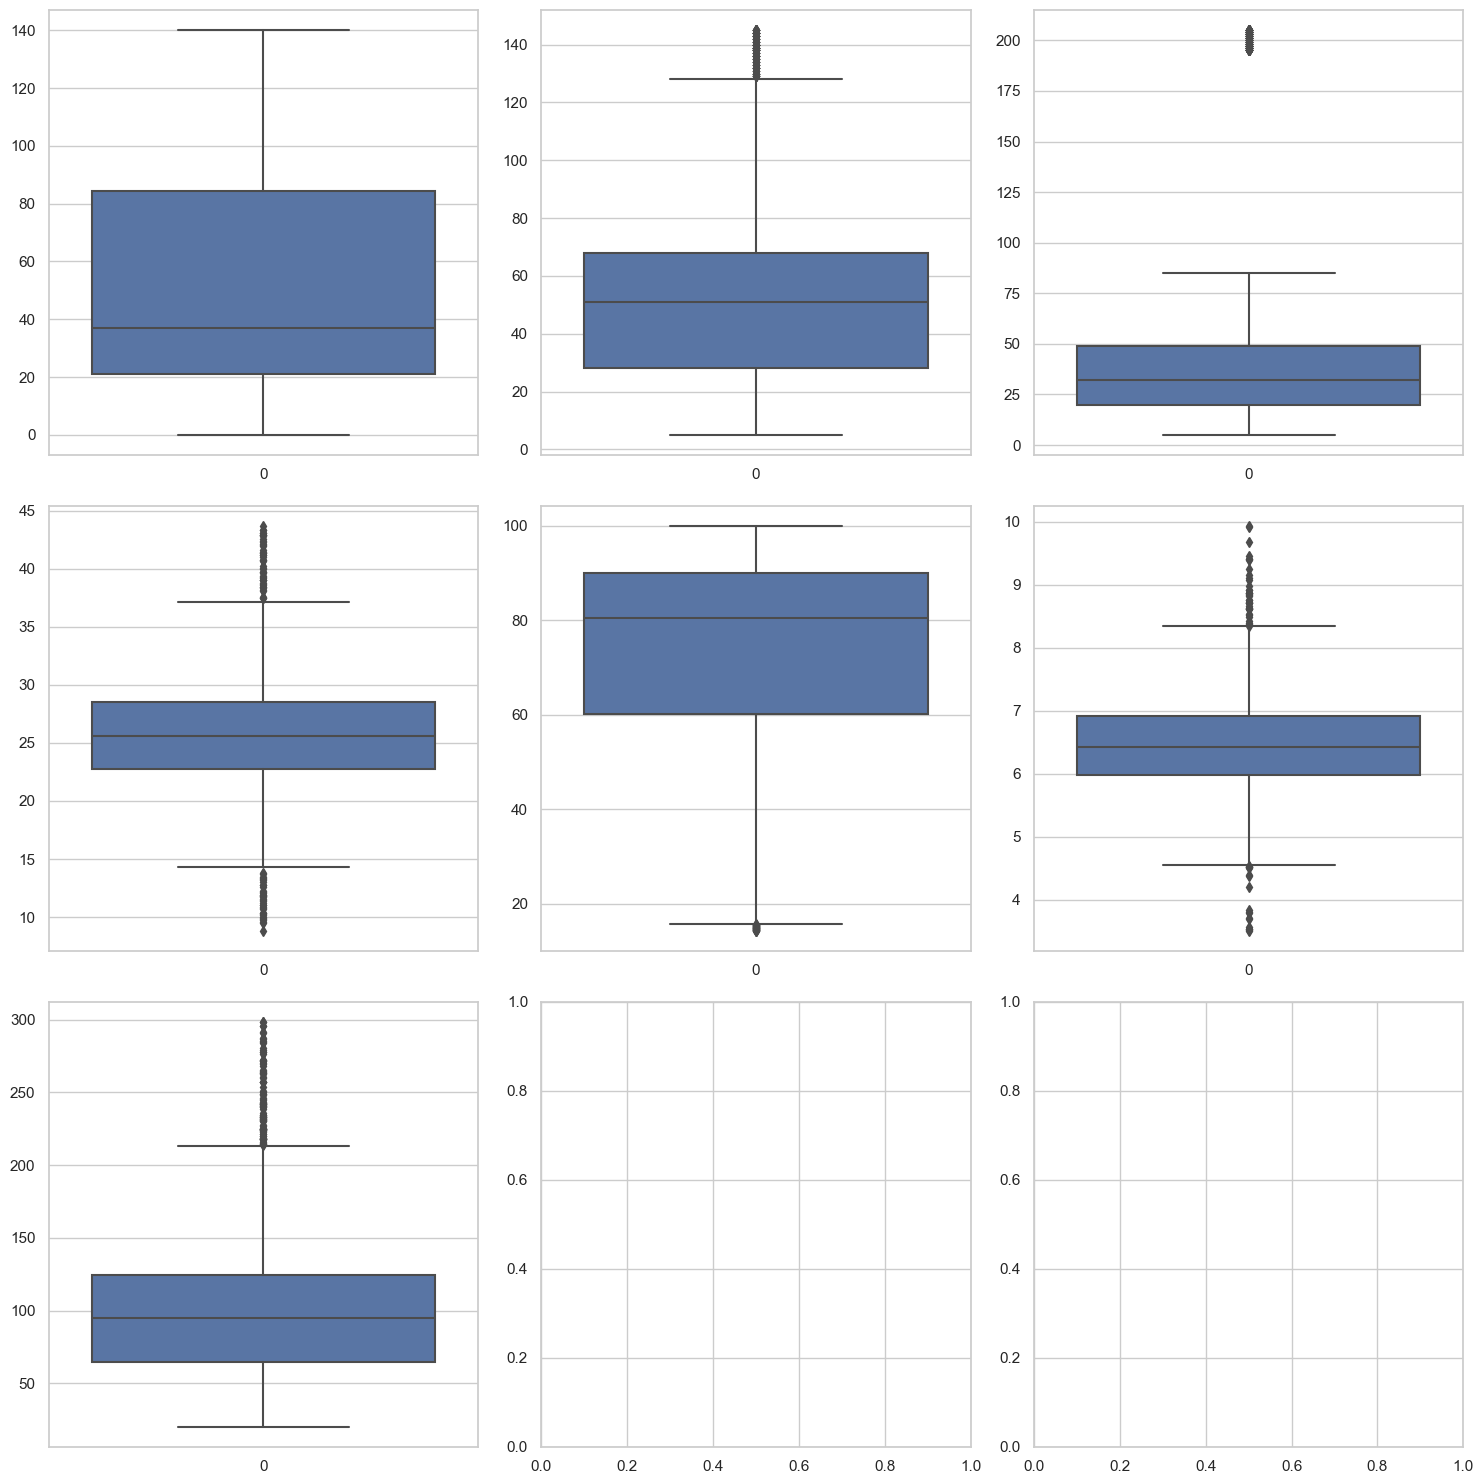

In [124]:
#Finding outliers - boxplot

fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i,subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [125]:
#correlation of featues
num_cols=crop.select_dtypes(include=np.number)
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


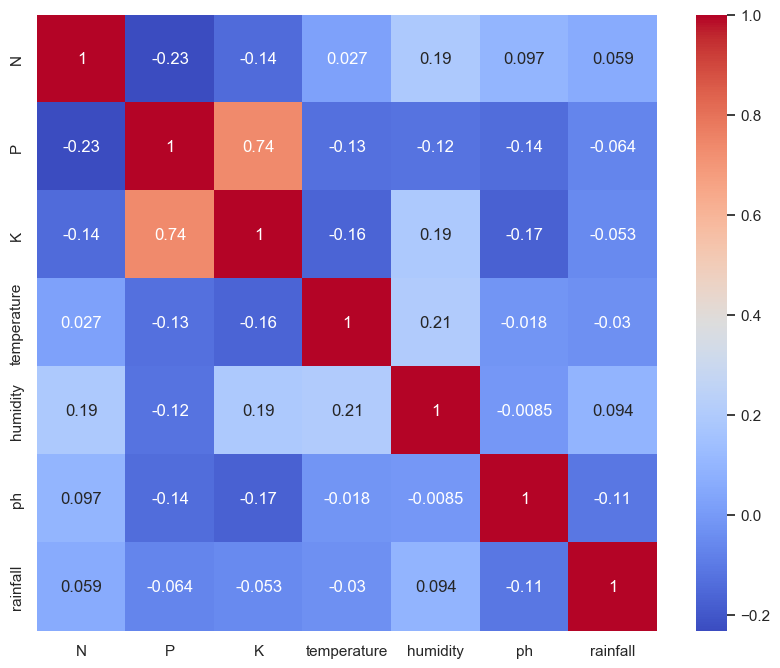

In [126]:
#visualizing with heat maps
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Encoding

In [127]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [41]:
crop_dict={'rice':1, 
           'maize':2, 
           'chickpea':3, 
           'kidneybeans':4, 
           'pigeonpeas':5,
           'mothbeans':6, 
           'mungbean':7, 
           'blackgram':8, 
           'lentil':9, 
           'pomegranate':10,
           'banana':11, 
           'mango':12, 
           'grapes':13, 
           'watermelon':14, 
           'muskmelon':15, 
           'apple':16,
           'orange':17, 
           'papaya':18, 
           'coconut':19, 
           'cotton':20, 
           'jute':21, 
           'coffee':22}

In [128]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [129]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [130]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


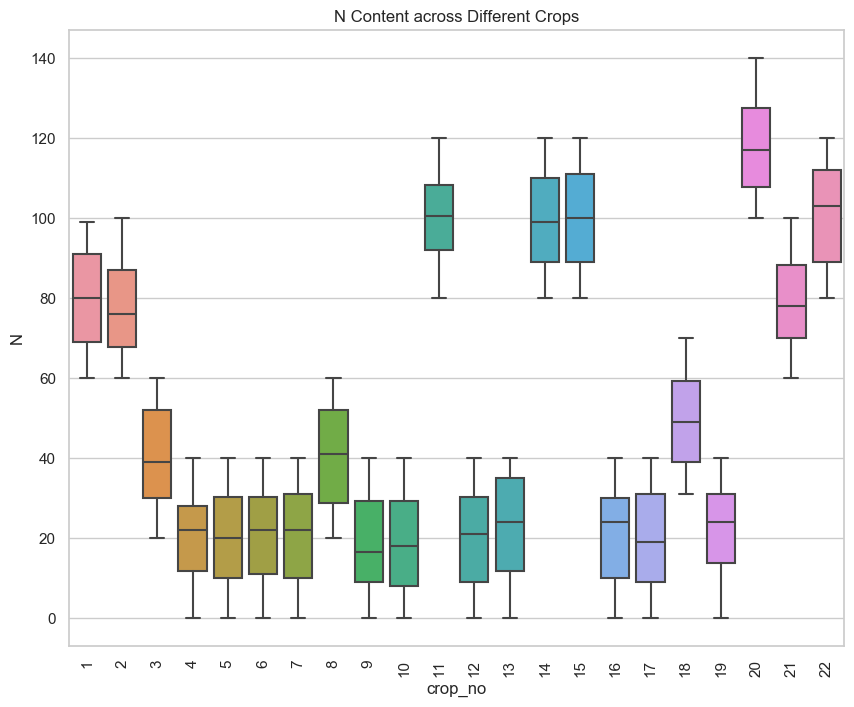

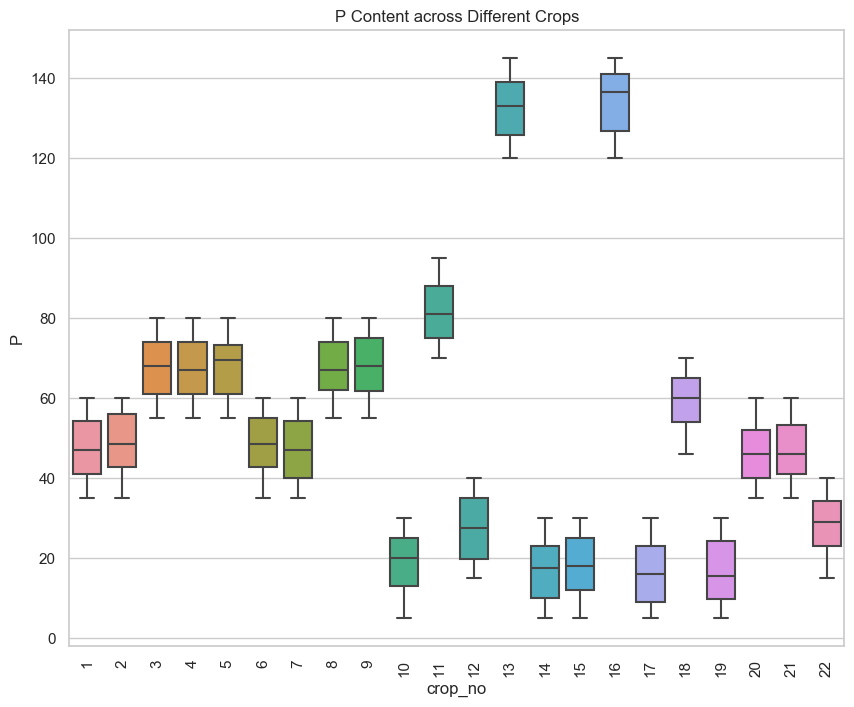

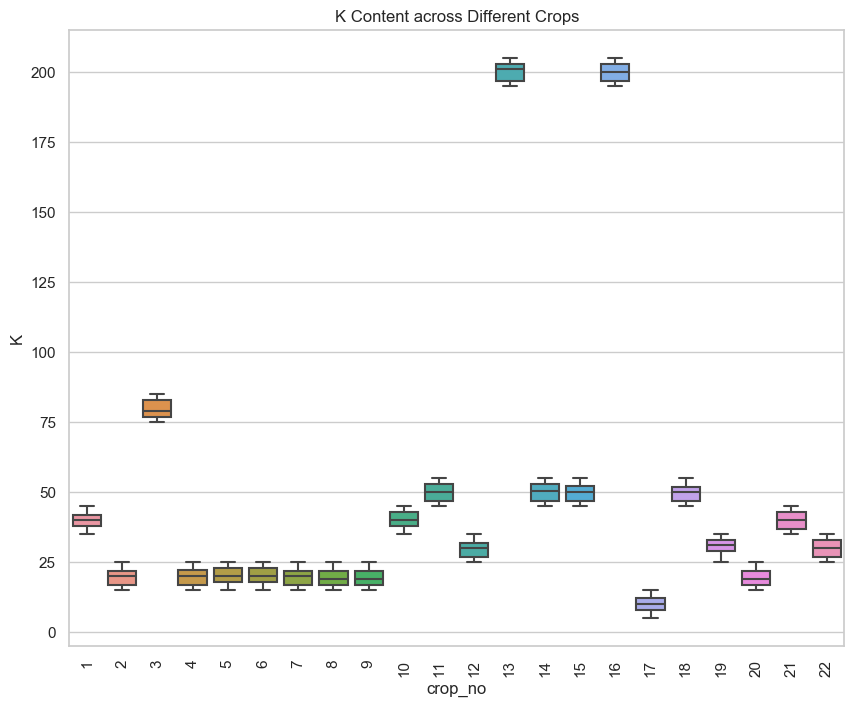

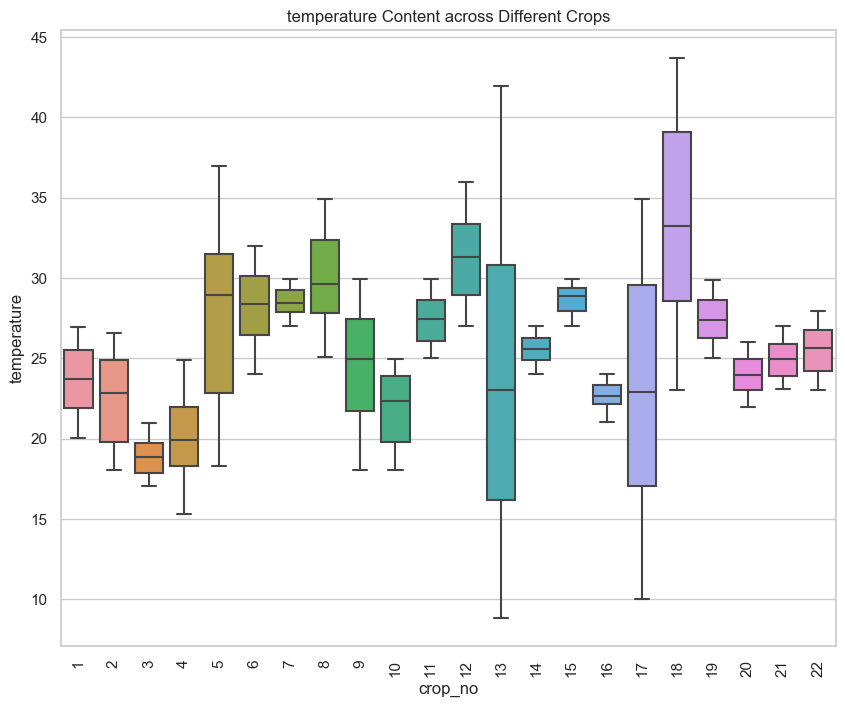

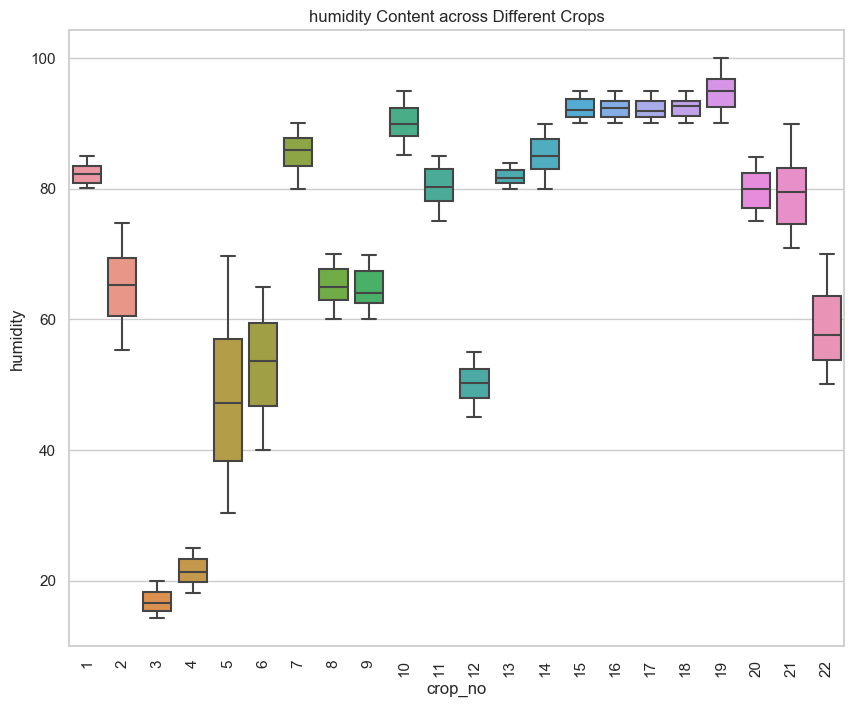

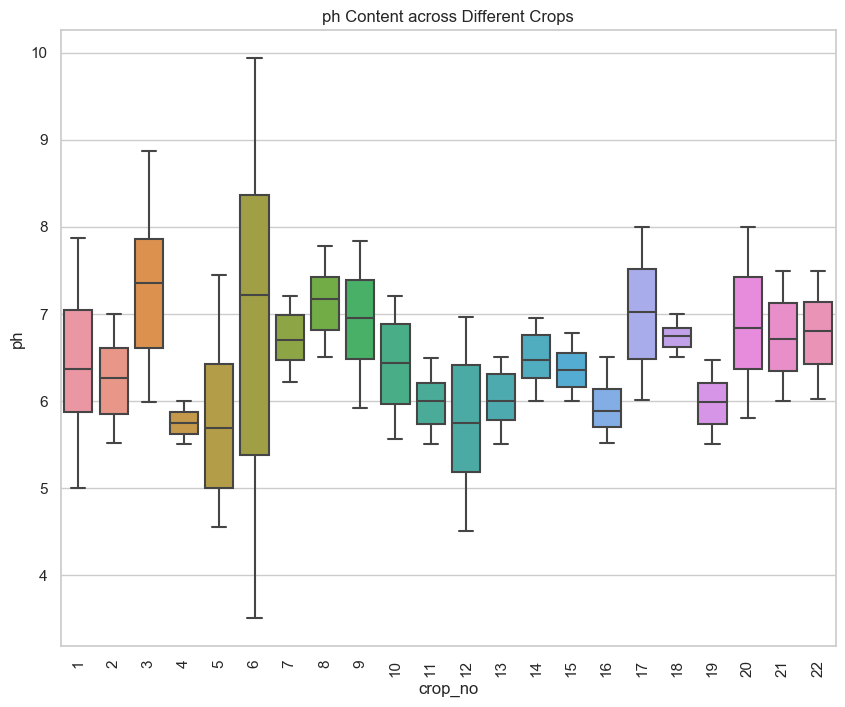

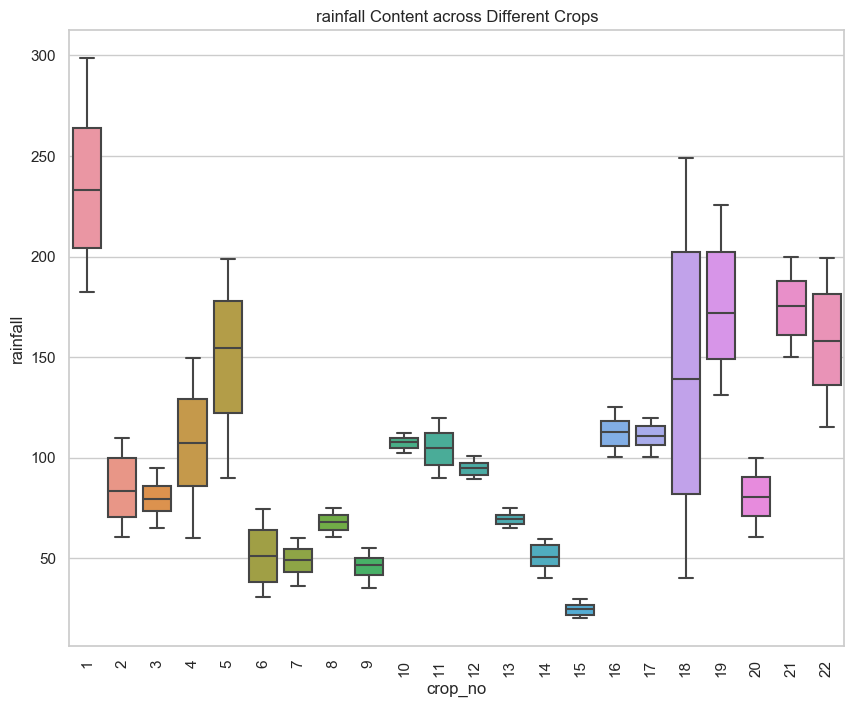

In [135]:

# Box Plots for a variable against crop types
feat=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i in feat:
    sns.boxplot(x='crop_no', y=i, data=crop)
    plt.xticks(rotation=90)
    plt.title('{0} Content across Different Crops'.format(i))
    plt.show()